# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
from random import choices
import matplotlib.pyplot as plt


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_rolls(num_rolls=10, sides=6):
    #from 1 to sides (inclusive)
    rolls = choices(range(1, sides + 1), k=num_rolls)
    
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Result': rolls})
    
    return df

In [3]:
dice_rolls_df = dice_rolls()
dice_rolls_df = dice_rolls_df.sort_values(by='Result')
dice_rolls_df

,Roll,Result
1,2,1
4,5,1
3,4,2
8,9,2
2,3,3
0,1,4
7,8,4
9,10,5
5,6,6
6,7,6


#### 2.- Plot the results sorted by value.

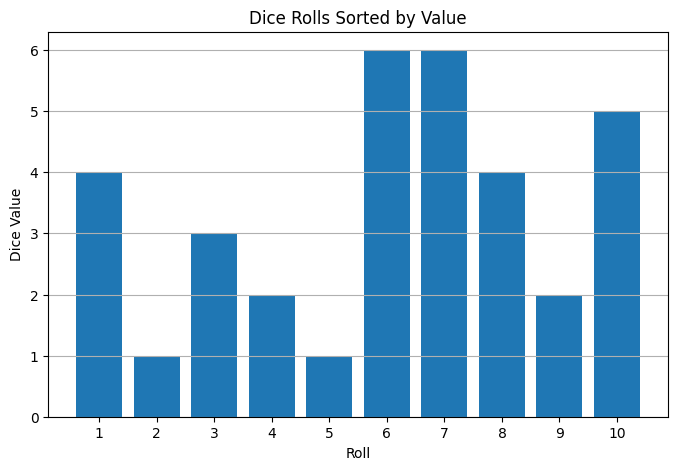

In [4]:
# your code here
plt.figure(figsize=(8, 5))
plt.bar(dice_rolls_df['Roll'], dice_rolls_df['Result'])
plt.xlabel('Roll')
plt.ylabel('Dice Value')
plt.title('Dice Rolls Sorted by Value')
plt.xticks(dice_rolls_df['Roll'])
plt.grid(axis='y')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here
frequency_dist = dice_rolls_df['Result'].value_counts().sort_index()
frequency_dist

1    2
2    2
3    1
4    2
5    1
6    2
Name: Result, dtype: int64

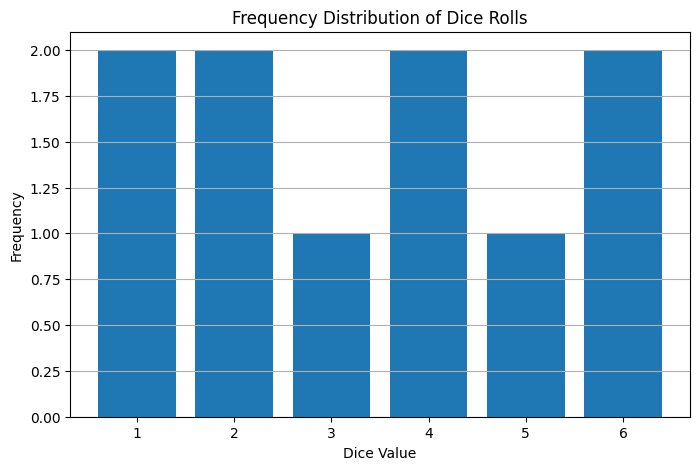

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(frequency_dist.index, frequency_dist.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls')
plt.xticks(frequency_dist.index)
plt.grid(axis='y')
plt.show()

In [7]:
"""frequency distribution plot shows how often each value occurred across all rolls while Dice Rolls Sorted by Value shows the result of each roll"""

'frequency distribution plot shows how often each value occurred across all rolls while Dice Rolls Sorted by Value shows the result of each roll'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def calculate_mean(data):
    total_sum = 0
    for value in data:
        total_sum = total_sum + value
    mean_value = total_sum/len(data)
    return mean_value

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here

frequency_dist = dice_rolls_df['Result'].value_counts().sort_index()

sum_products = 0
for value, frequency in frequency_dist.items():
    sum_products += value * frequency

total_count = frequency_dist.sum()

mean = sum_products / total_count if total_count > 0 else 0

print("Mean value:", mean)


Mean value: 3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here

def calculate_median(data):
    sorted_data = sorted(data)

    num_observations = len(sorted_data)
    is_odd = num_observations % 2 != 0

    if is_odd:
        median_index = num_observations // 2
        median_value = sorted_data[median_index]
    else:
        upper_median_index = num_observations // 2
        lower_median_index = upper_median_index - 1
        median_value = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2

    return median_value


In [11]:
calculate_median(dice_rolls_df['Result'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
# your code here

def calculate_quartiles(data):
    sorted_data = sorted(data)

    median = calculate_median(sorted_data)

    lower_half = [x for x in sorted_data if x < median]
    upper_half = [x for x in sorted_data if x > median]

    q1 = calculate_median(lower_half)

    q3 = calculate_median(upper_half)

    return q1, median, q3


In [13]:
calculate_quartiles(dice_rolls_df['Result'])

(2, 3.5, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [94]:
# your code here
roll_the_dice_hundred = pd.read_csv('/Users/anna/iron_hack/Descriptive-Stats/data/roll_the_dice_hundred.csv')
roll_the_dice_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [105]:
sorted_values = roll_the_dice_hundred['value'].sort_values()
sorted_values.head(15)

0     1
47    1
56    1
9     1
73    1
63    1
26    1
89    1
3     1
94    1
82    1
97    1
33    2
37    2
41    2
Name: value, dtype: int64

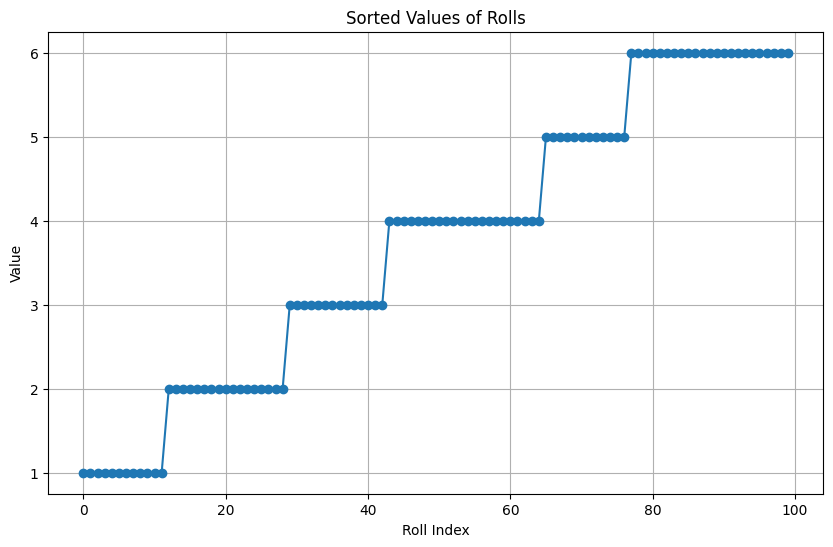

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_values.values, marker='o')
plt.title('Sorted Values of Rolls')
plt.xlabel('Roll Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [107]:
"""
The values 4 and 6 are the ones with highest frequency
"""

'\nThe values 4 and 6 are the ones with highest frequency\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
# your code here
roll_the_dice_hundred_mean = calculate_mean(roll_the_dice_hundred['value'])
roll_the_dice_hundred_mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
# your code here
frequency_dist_hundred = roll_the_dice_hundred['value'].value_counts().sort_index()
frequency_dist_hundred

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

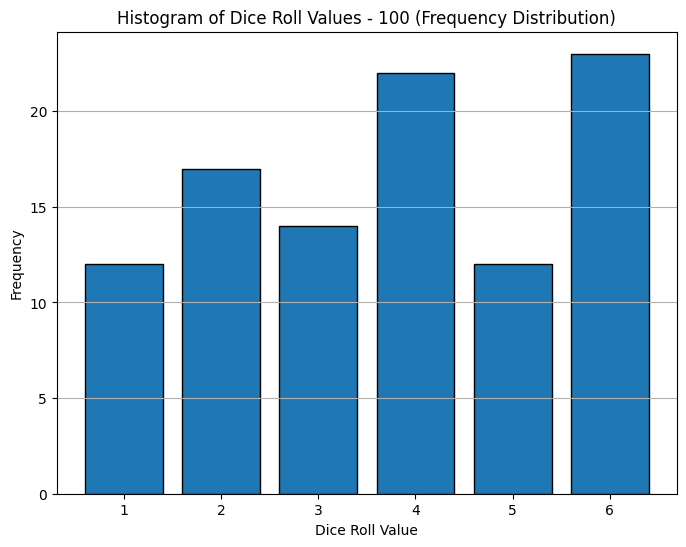

In [21]:
# your code here
plt.figure(figsize=(8, 6))
plt.bar(frequency_dist_hundred.index, frequency_dist_hundred.values, width=0.8, align='center', edgecolor='black')
plt.title('Histogram of Dice Roll Values - 100 (Frequency Distribution)')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.xticks(frequency_dist_hundred.index)
plt.grid(axis='y')


In [22]:
"""
your comments here
"""

'\nyour comments here\n'

In [23]:
calculate_median(roll_the_dice_hundred['value'])

4.0

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [24]:
# your code here
roll_the_dice_thousand = pd.read_csv('/Users/anna/iron_hack/Descriptive-Stats/data/roll_the_dice_thousand.csv')
roll_the_dice_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [25]:
frequency_dist_thousand = roll_the_dice_thousand['value'].value_counts().sort_index()
frequency_dist_thousand

1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

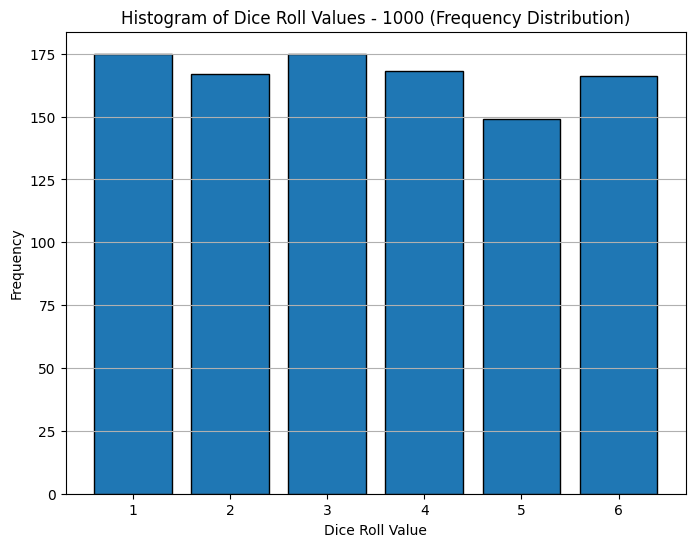

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(frequency_dist_thousand.index, frequency_dist_thousand.values, width=0.8, align='center', edgecolor='black')
plt.title('Histogram of Dice Roll Values - 1000 (Frequency Distribution)')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.xticks(frequency_dist_thousand.index)
plt.grid(axis='y')

In [27]:
"""the more times you roll the dice the more evenly the result is distributed"""

'the more times you roll the dice the more evenly the result is distributed'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [59]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [47]:
frequency_dist_ages = ages_population['observation'].value_counts().sort_index()
frequency_dist_ages

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64

<AxesSubplot:>

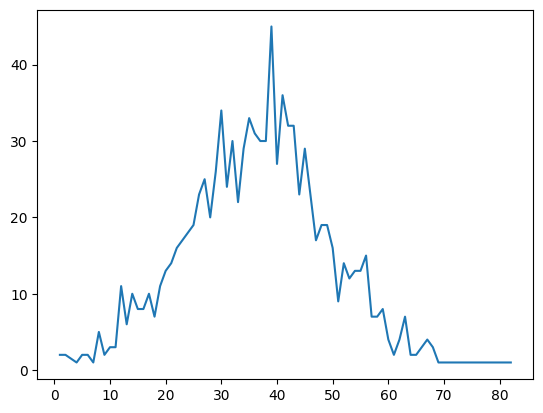

In [48]:
frequency_dist_ages.plot()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [53]:
# your code here
ages_population_mean = ages_population['observation'].mean()
ages_population_mean

36.56

In [54]:
ages_population_std = ages_population['observation'].std()
ages_population_std

12.81649962597677

In [73]:
"""
Given the plot of the frequencies above I was guessing it could have been around 35
"""

'\nGiven the plot of the frequencies above I was guessing it could have been around 35\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [60]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [61]:
frequency_dist_ages2 = ages_population2['observation'].value_counts().sort_index()
frequency_dist_ages2

19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64

<AxesSubplot:>

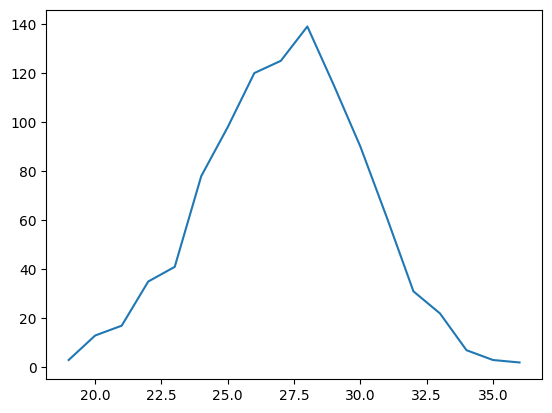

In [62]:
frequency_dist_ages2.plot()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [74]:
"""
The frequency distribution is respectively on the left and on the right of the maximum, monotonically increasing and monotonically decreasing.
"""

'\nThe frequency distribution is respectively on the left and on the right of the maximum, monotonically increasing and monotonically decreasing\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [63]:
# your code here
ages_population_mean2 = ages_population2['observation'].mean()
ages_population_mean2

27.155

In [64]:
ages_population_std2 = ages_population2['observation'].std()
ages_population_std2

2.9698139326891835

In [75]:
"""
The max and min value of the population age are closer to each other than a smaller std is to be expected, as the variation around the mean is smaller"""

'\nThe max and min value of the population age are closer to each other than a smaller std is to be expected, as the variation around the mean is smaller'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [65]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [66]:
frequency_dist_ages3 = ages_population3['observation'].value_counts().sort_index()
frequency_dist_ages3

1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: observation, Length: 75, dtype: int64

<AxesSubplot:>

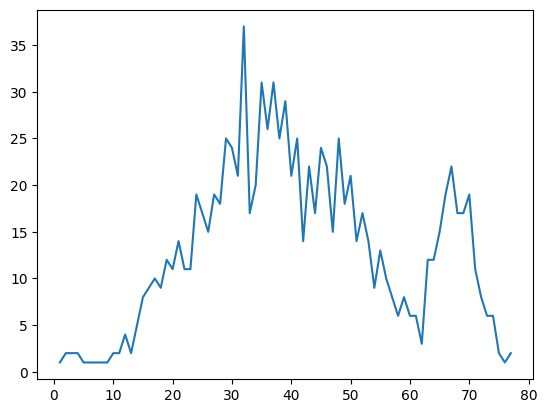

In [67]:
frequency_dist_ages3.plot()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [68]:
# your code here
ages_population_mean3 = ages_population3['observation'].mean()
ages_population_mean3

41.989

In [69]:
ages_population_std3 = ages_population3['observation'].std()
ages_population_std3

16.14470595986593

In [76]:
"""
The mean and std are similar but they do not capture that the distribution is made of two gaussian shapes
"""

'\nThe mean and std are similar but they do not capture that the distribution is made of two gaussian shapes\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
# your code here
ages_quartiles = calculate_quartiles(ages_population3['observation'])
ages_quartiles

(30.0, 40.0, 53.0)

In [77]:
"""
there is not much difference 
"""

'\nthere is not much difference \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [81]:
# your code here
quantiles = [0.10, 0.30, 0.60, 0.90]
for q in quantiles:
    print(ages_population3['observation'].quantile(q))

22.0
32.0
45.0
67.0


In [84]:
ages_population3['observation'].quantile(0.82)

60.0

In [85]:
ages_population['observation'].quantile(0.82)

48.0

In [90]:
ages_population['observation'].quantile(0.965)

60.0

In [93]:
"""
In ages population3 18% of the data points have age above 60, while in the original age population only 3.5% have age above 60 (even if the two distributions have similar mean and std). 
"""

'\nIn ages population3 18% of the data points have age above 60, while in the original age population only 3.5% have age above 60 (even if the two distributions have similar mean and std). \n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [42]:
# your code here

In [43]:
"""
your comments here
"""

'\nyour comments here\n'